<a href="https://colab.research.google.com/github/ferreirabruno7/Text_analyze/blob/master/Embaixadores_da_Cidadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import urllib
import bs4 as bs
import re
from gensim.models import Word2Vec
from nltk.corpus import brown
import pandas as pd
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [2]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9017e16c69bdacc92e0e30902d8cca6509615637abaacb26953dfe4717009940
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [3]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
comentarios = pd.read_csv("/content/drive/My Drive/Colab Notebooks/embaixadores.csv", delimiter = ';', encoding='iso-8859-1')
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    1413 non-null   int64 
 1   Nome                  1413 non-null   object
 2   Nome_social           1 non-null      object
 3   Data_nascimento       1413 non-null   object
 4   Pais                  1413 non-null   object
 5   Estado                1413 non-null   object
 6   Municipio             1338 non-null   object
 7   Cpf                   1407 non-null   object
 8   Sexo                  1413 non-null   object
 9   Raca                  1413 non-null   object
 10  Qual_deficiencia      31 non-null     object
 11  Zona_residencial      1413 non-null   object
 12  Escolaridade          1413 non-null   object
 13  Qt_pessoas_moram      1413 non-null   object
 14  Quem_mora             1413 non-null   object
 15  Renda                 1413 non-null   

In [7]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [8]:
def lexical_diversity(text):
  if len(set(text))>0:
    return len(text) / len(set(text))
 
def percentage(count, total):
    return 100 * count / total
     

In [10]:
#transformar coluna em lista
col_one_list = comentarios['Papel_cidadao'].tolist()
texto = str(col_one_list)
texto

'[\'Não\', \'Já atuei como conselheiro de políticas públicas para a juventude e direitos humanos. Acredito que seja uma excelente forma de participação social e aproximação do poder público e a sociedade, garantindo a cidadania e o controle social.\', \'Em uma sociedade democrática as decisões devem ser tomadas de maneira coletiva e não é só isso mas todos os espaços são de responsabilidade coletiva inclusive o cuidado de locais e pessoas devem ser de responsabilidade coletiva. Tenho interesse em participar de assuntos em comum sobretudo em assuntos relacionados à vulnerabilidade social.\', \'O papel é participativo e proativo. Sim, interessa em ações que possam contribuir para o bem comum\', \'Sim\', \'Em primeiro lugar, falar sobre sociedade é uma questão que requer bastante uma discussão bastante minuciosa, na medida em que o sujeito é um sujeito social. Nesse sentido, é viável que se considere a subjetividade de tal e que se favoreça a participação de todos no ambiente político, cu

In [11]:
# conveter lista para texto
nltk.download('punkt')
texto = str(col_one_list)
type(texto)
moby_tokens = nltk.word_tokenize(texto)
text1 = nltk.Text(moby_tokens)
text1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Text: [ 'Não ' , 'Já atuei como conselheiro...>

In [12]:
#total de termos no documento
from nltk.stem import WordNetLemmatizer

def total_termos():

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w,'v') for w in text1]

    return len(set(lemmatized))

total_termos()

5093

In [13]:
#importar bibliotecas bigram
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

In [14]:
#bigram tokens
procurar = BigramCollocationFinder.from_words(moby_tokens)

In [15]:
#retira stopwords
retira = set(stopwords.words('portuguese'))

In [16]:
filtra = lambda w: len(w) <3 or w in retira

In [17]:
procurar.apply_word_filter(filtra)


In [18]:
#bigrams
procurar.nbest(BigramAssocMeasures.likelihood_ratio, 40)


[('espaços', 'comunitários'),
 ('Tenho', 'interesse'),
 ('interesse', 'comum'),
 ('suma', 'importância'),
 ('Não', 'participo'),
 ('principais', 'instituições'),
 ('espaço', 'comunitário'),
 ('pretende', 'viver'),
 ('atos', 'públicos'),
 ('ativo', 'socialmente'),
 ('extrema', 'importância'),
 ('bem', 'comum'),
 ('outras', 'pessoas'),
 ('políticas', 'públicas'),
 ('deve', 'escolher'),
 ('bem', 'estar'),
 ('longo', 'prazo'),
 ('cada', 'vez'),
 ('grande', 'importância'),
 ('ser', 'ativo'),
 ('poder', 'emana'),
 ('gerar', 'maior'),
 ('maior', 'qualidade'),
 ('processo', 'democrático'),
 ('Nunca', 'participei'),
 ('podem', 'gerar'),
 ('igualdade', 'perante'),
 ('alguma', 'forma'),
 ('trabalhos', 'voluntários'),
 ('interesse', 'sim'),
 ('participação', 'social'),
 ('melhor', 'forma'),
 ('ações', 'sociais'),
 ('nunca', 'participei'),
 ('ser', 'humano'),
 ('baixa', 'renda'),
 ('participação', 'popular'),
 ('cidadãos', 'almejam'),
 ('ser', 'votado'),
 ('muitas', 'vezes')]

In [19]:
#termos frequentes com mais de 5 caracteres top 10
def termos_frequentes():
    dist = nltk.FreqDist(text1)
    vocab1 = dist.keys()
    freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] > 2]
    return sorted(freqwords)

termos_frequentes()

["'Acho",
 "'Acredito",
 "'Ajuda",
 "'Ajudar",
 "'Bom",
 "'Buscar",
 "'Cada",
 "'Cidadania",
 "'Cidadão",
 "'Com",
 "'Como",
 "'Dentro",
 "'Entendo",
 "'Exercer",
 "'Fiscalizar",
 "'Gostaria",
 "'Importante",
 "'Importância",
 "'Levar",
 "'Lutar",
 "'Muito",
 "'Não",
 "'Nós",
 "'Para",
 "'Participar",
 "'Participação",
 "'Por",
 "'Porque",
 "'Quando",
 "'SIM",
 "'Sem",
 "'Ser",
 "'Sim",
 "'Somente",
 "'Talvez",
 "'Tem",
 "'Tenho",
 "'Todo",
 "'Todos",
 "'Uma",
 "'Vivemos",
 "'bom",
 "'muito",
 "'sim",
 "'tenho",
 '1988',
 'AJUDA',
 'Acho',
 'Acredito',
 'Ainda',
 'Além',
 'Assim',
 'Através',
 'Atualmente',
 'Brasil',
 'CADA',
 'CF/88',
 'CIDADANIA',
 'CIDADÃO',
 'COMO',
 'Carta',
 'Cidadania',
 'Cidadão',
 'Como',
 'Constituição',
 'Creio',
 'DEMOCRACIA',
 'DESENVOLVIMENTO',
 'DIREITOS',
 'Dessa',
 'Devemos',
 'Diante',
 'Direito',
 'ESPAÇO',
 'ESPAÇOS',
 'Então',
 'Essa',
 'Estado',
 'Estar',
 'Existem',
 'FISCALIZAR',
 'Fazer',
 'Federal',
 'GERAL',
 'Goiás',
 'Gostaria',
 'Gosto',


In [20]:
dist = nltk.FreqDist(text1)
vocab1 = dist.keys()
freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] > 2]
total = str(freqwords)


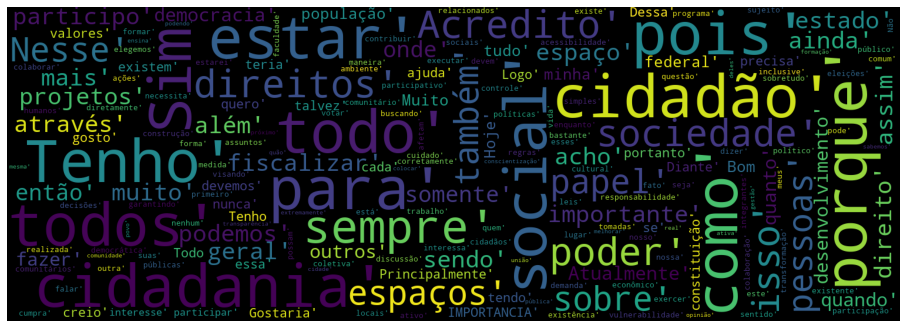

In [21]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(total)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:

#importação de bibliotecacas
import tweepy
import re 
import pickle
import pandas as pd
import nltk
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
comentarios['Papel_cidadao'] = comentarios['Papel_cidadao'].fillna('').apply(str)

In [26]:
# Load the regular expression library
import re
# Remove punctuation
comentarios['impacto_processed'] = comentarios['Papel_cidadao'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
comentarios['impacto_processed'] = comentarios['Papel_cidadao'].map(lambda x: x.lower())
# Print out the first rows of papers
comentarios['impacto_processed'].head()

0                                                  não
1    já atuei como conselheiro de políticas pública...
2    em uma sociedade democrática as decisões devem...
3    o papel é participativo e proativo. sim, inter...
4                                                  sim
Name: impacto_processed, dtype: object

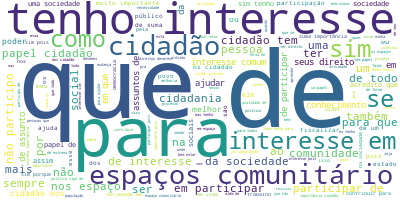

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(comentarios['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [30]:
#ajsutar dataframe
dfObj = [e for e in comentarios["impacto_processed"] if isinstance(e, str)]
dfObj = pd.DataFrame(dfObj)

In [31]:
#importa biblitotecas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer() # variar parametros (L1/L2, etc)
X = vectorizer.fit_transform(comentarios["impacto_processed"])
X = normalize(X)

In [32]:
kmeans = KMeans(
    n_clusters = 8, # variar
    n_init = 15, 
    max_iter = 450, 
    init = 'k-means++'
)

In [33]:
#treinar com kmeans

kmeans.fit(X)

KMeans(max_iter=450, n_init=15)

In [34]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00043953,
        0.00136669],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
comentarios['cluster'] = kmeans.labels_


In [36]:
def lexical_diversity(text):
  if len(set(text))>0:
    return len(text) / len(set(text))

In [37]:
def total_token(text):
    return len(set(nltk.word_tokenize(text)))

In [38]:
def total(text):
     return len(text)

In [39]:
comentarios["Qtd_palavras"]= comentarios["Papel_cidadao"].str.count("", re.I)
comentarios["lexical"] = comentarios["Papel_cidadao"].apply(lexical_diversity)
comentarios["tokens_"] = comentarios["Papel_cidadao"].apply(total_token)

comentarios.head()


,Id,Nome,Nome_social,Data_nascimento,Pais,Estado,Municipio,Cpf,Sexo,Raca,...,Atividades_praticas,Como_ficou_sabendo,Papel_cidadao,Termo_aceite,Data_cadastro,impacto_processed,cluster,Qtd_palavras,lexical,tokens_
0,1,Amanda costa santos,NaN,31/05/2001,brasil,GO,MONTIVIDIU,706.748.401-43,feminino,pardo,...,Talvez,Prefeitura do meu municipio,Não,Aceito,22/03/2022 12:32,não,2,4,1.000000,1
1,2,Valdeir Cesário dos Santos,NaN,03/06/1989,brasil,GO,GOIANIA,025.612.671-21,masculino,pardo,...,Sim,instagram,Já atuei como conselheiro de políticas pública...,Aceito,22/03/2022 12:34,já atuei como conselheiro de políticas pública...,4,236,7.343750,32
2,3,Ana Cláudia Alves Azevedo,NaN,26/05/1995,brasil,GO,GOIANIA,021.988.281-97,feminino,preto,...,Sim,instagram,Em uma sociedade democrática as decisões devem...,Aceito,22/03/2022 12:47,em uma sociedade democrática as decisões devem...,6,341,12.142857,40
3,4,José Avelino Filho,NaN,25/06/1976,brasil,GO,BOM JESUS DE GOIAS,796.191.691-15,masculino,pardo,...,Sim,instagram,"O papel é participativo e proativo. Sim, inter...",Aceito,22/03/2022 12:51,"o papel é participativo e proativo. sim, inter...",4,99,4.083333,19
4,5,Eloah Cardoso Caetano,NaN,17/10/2000,brasil,GO,CIDADE OCIDENTAL,066.044.991-97,feminino,pardo,...,Sim,Prefeitura do meu municipio,Sim,Aceito,22/03/2022 13:05,sim,5,4,1.000000,1


In [40]:
comentarios['cluster'].value_counts()

4    595
6    472
3    107
0     91
5     48
7     42
1     30
2     28
Name: cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print('silhueta media:', silhouette_avg)

silhueta media: 0.00772661115485258


In [41]:
comentarios.to_csv('/content/drive/My Drive/Colab Notebooks/embaixadores_da_cidadania_02_04.csv')


In [42]:
cluster0 = comentarios[comentarios['cluster']==0]
cluster1 = comentarios[comentarios['cluster']==1]
cluster2 = comentarios[comentarios['cluster']==2]
cluster3 = comentarios[comentarios['cluster']==3]
cluster4 = comentarios[comentarios['cluster']==4]
cluster5 = comentarios[comentarios['cluster']==5]
cluster6 = comentarios[comentarios['cluster']==6]
cluster7 = comentarios[comentarios['cluster']==7]



```
# Isto está formatado como código
```

## **Cluster 0**

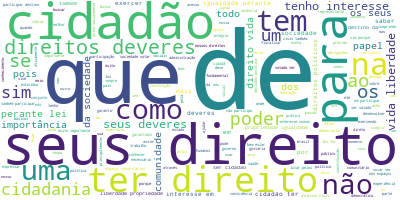

In [43]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster0['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# **Cluster 1**

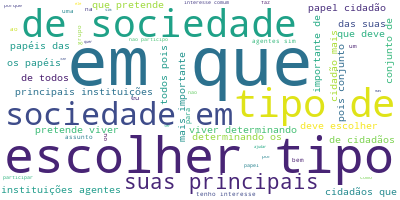

In [45]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster1['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### **Cluster 2**

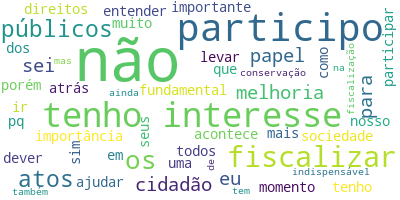

In [47]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster2['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## **Cluster 3**

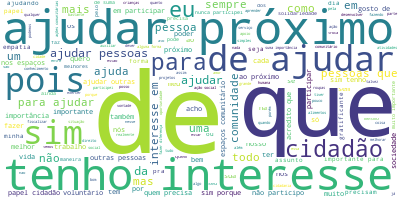

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster3['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## **Cluster 4**

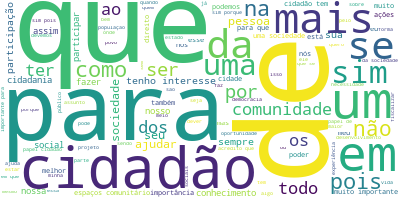

In [49]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster4['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## **Cluster 5**

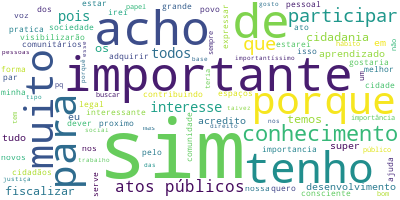

In [50]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster5['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Cluster 6

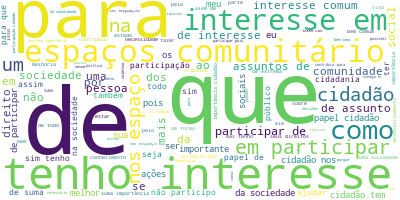

In [52]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster6['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## **Cluster 7**

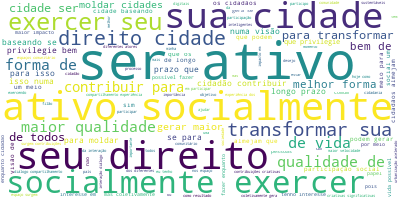

In [53]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cluster7['impacto_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# **Construção de Critérios**

In [54]:
comentarios.head()


,Id,Nome,Nome_social,Data_nascimento,Pais,Estado,Municipio,Cpf,Sexo,Raca,...,Atividades_praticas,Como_ficou_sabendo,Papel_cidadao,Termo_aceite,Data_cadastro,impacto_processed,cluster,Qtd_palavras,lexical,tokens_
0,1,Amanda costa santos,NaN,31/05/2001,brasil,GO,MONTIVIDIU,706.748.401-43,feminino,pardo,...,Talvez,Prefeitura do meu municipio,Não,Aceito,22/03/2022 12:32,não,2,4,1.000000,1
1,2,Valdeir Cesário dos Santos,NaN,03/06/1989,brasil,GO,GOIANIA,025.612.671-21,masculino,pardo,...,Sim,instagram,Já atuei como conselheiro de políticas pública...,Aceito,22/03/2022 12:34,já atuei como conselheiro de políticas pública...,4,236,7.343750,32
2,3,Ana Cláudia Alves Azevedo,NaN,26/05/1995,brasil,GO,GOIANIA,021.988.281-97,feminino,preto,...,Sim,instagram,Em uma sociedade democrática as decisões devem...,Aceito,22/03/2022 12:47,em uma sociedade democrática as decisões devem...,6,341,12.142857,40
3,4,José Avelino Filho,NaN,25/06/1976,brasil,GO,BOM JESUS DE GOIAS,796.191.691-15,masculino,pardo,...,Sim,instagram,"O papel é participativo e proativo. Sim, inter...",Aceito,22/03/2022 12:51,"o papel é participativo e proativo. sim, inter...",4,99,4.083333,19
4,5,Eloah Cardoso Caetano,NaN,17/10/2000,brasil,GO,CIDADE OCIDENTAL,066.044.991-97,feminino,pardo,...,Sim,Prefeitura do meu municipio,Sim,Aceito,22/03/2022 13:05,sim,5,4,1.000000,1


In [81]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1413 non-null   int64  
 1   Nome                     1413 non-null   object 
 2   Nome_social              1 non-null      object 
 3   Data_nascimento          1413 non-null   object 
 4   Pais                     1413 non-null   object 
 5   Estado                   1413 non-null   object 
 6   Municipio                1338 non-null   object 
 7   Cpf                      1407 non-null   object 
 8   Sexo                     1413 non-null   object 
 9   Raca                     1413 non-null   object 
 10  Qual_deficiencia         31 non-null     object 
 11  Zona_residencial         1413 non-null   object 
 12  Escolaridade             1413 non-null   object 
 13  Qt_pessoas_moram         1413 non-null   object 
 14  Quem_mora               

In [126]:
comentarios['new_voluntariado'] = comentarios['Voluntariado'].map(lambda x: 2 if x == "Sim" else 0)
comentarios.loc[comentarios['Atividades_praticas'] ==  'Sim', 'new_atividades_praticas'] = 6
comentarios.loc[comentarios['Atividades_praticas'] ==  'Não', 'new_atividades_praticas'] = 0
comentarios.loc[comentarios['Atividades_praticas'] ==  'Talvez', 'new_atividades_praticas'] = 1 





In [127]:
comentarios['new_atividades_praticas'].value_counts()


6    889
1    415
0    109
Name: new_atividades_praticas, dtype: int64

In [128]:
comentarios['Atividades_praticas'].value_counts()


Sim       889
Talvez    415
Não       109
Name: Atividades_praticas, dtype: int64

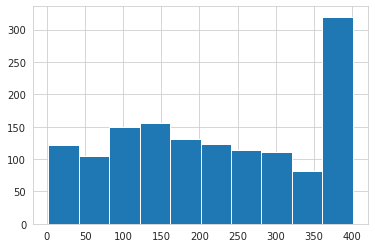

In [129]:
comentarios['Qtd_palavras'].hist()

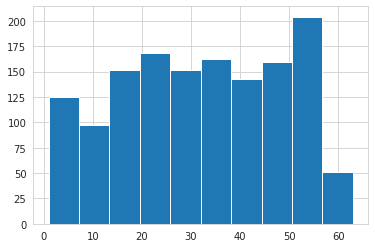

In [130]:
comentarios['tokens_'].hist()

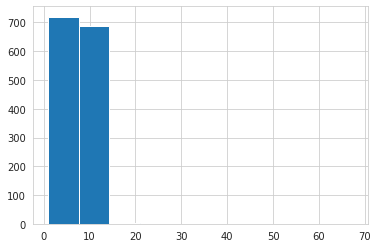

In [131]:
comentarios['lexical'].hist()

In [132]:
comentarios['lexical'].median()

7.551724137931035

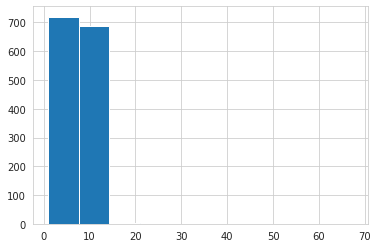

In [133]:
comentarios['lexical'].hist()

In [134]:
pobre_lexial = comentarios[comentarios['lexical']<3]
len(pobre_lexial)

169

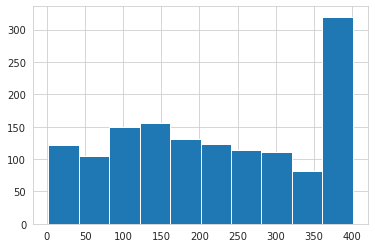

In [135]:
comentarios['Qtd_palavras'].hist()

In [136]:
#impacto comprometimento
comentarios.loc[(comentarios['lexical'] > 8) |  (comentarios['lexical'] < 3), 'new_lexical'] = 1 
comentarios.loc[comentarios['lexical'] < 3, 'new_lexical'] = 0 
comentarios.loc[comentarios['lexical'] > 8, 'new_lexical'] = 2



In [137]:
comentarios['new_lexical'].fillna(1, inplace=True)


In [138]:
comentarios['new_lexical'].value_counts()

2    656
1    588
0    169
Name: new_lexical, dtype: int64

In [145]:
#clareza
comentarios.loc[(comentarios['Qtd_palavras'] > 250) |  (comentarios['Qtd_palavras'] < 100), 'new_Qtd_palavras'] = 1 
comentarios.loc[comentarios['Qtd_palavras'] > 400, 'new_Qtd_palavras'] = 2 
comentarios.loc[comentarios['Qtd_palavras'] < 100, 'new_Qtd_palavras'] = 0

In [146]:
comentarios['new_Qtd_palavras'].fillna(1, inplace=True)


In [147]:
comentarios['new_Qtd_palavras'].value_counts()

1    933
0    303
2    177
Name: new_Qtd_palavras, dtype: int64

In [148]:
#criatividade
comentarios.loc[(comentarios['tokens_'] > 30) |  (comentarios['tokens_'] < 20), 'new_tokens_'] = 1 
comentarios.loc[comentarios['tokens_'] > 50, 'new_tokens_'] = 2 
comentarios.loc[comentarios['tokens_'] < 20, 'new_tokens_'] = 0

In [150]:
comentarios['new_tokens_'].fillna(1, inplace=True)


In [151]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1413 non-null   int64  
 1   Nome                     1413 non-null   object 
 2   Nome_social              1 non-null      object 
 3   Data_nascimento          1413 non-null   object 
 4   Pais                     1413 non-null   object 
 5   Estado                   1413 non-null   object 
 6   Municipio                1338 non-null   object 
 7   Cpf                      1407 non-null   object 
 8   Sexo                     1413 non-null   object 
 9   Raca                     1413 non-null   object 
 10  Qual_deficiencia         31 non-null     object 
 11  Zona_residencial         1413 non-null   object 
 12  Escolaridade             1413 non-null   object 
 13  Qt_pessoas_moram         1413 non-null   object 
 14  Quem_mora               

In [152]:
comentarios["new_atividades_praticas"] = comentarios["new_atividades_praticas"].astype(int)
comentarios["new_lexical"] = comentarios["new_lexical"].astype(int)
comentarios["new_Qtd_palavras"] = comentarios["new_Qtd_palavras"].astype(int)
comentarios["new_tokens_"] = comentarios["new_tokens_"].astype(int)
comentarios["nota_final"] = comentarios["new_voluntariado"]+comentarios["new_atividades_praticas"]+comentarios["new_lexical"]+comentarios["new_Qtd_palavras"]+comentarios["new_tokens_"]

In [153]:
comentarios.head()

,Id,Nome,Nome_social,Data_nascimento,Pais,Estado,Municipio,Cpf,Sexo,Raca,...,cluster,Qtd_palavras,lexical,tokens_,new_voluntariado,new_atividades_praticas,new_lexical,new_Qtd_palavras,new_tokens_,nota_final
0,1,Amanda costa santos,NaN,31/05/2001,brasil,GO,MONTIVIDIU,706.748.401-43,feminino,pardo,...,2,4,1.000000,1,0,1,0,0,0,1
1,2,Valdeir Cesário dos Santos,NaN,03/06/1989,brasil,GO,GOIANIA,025.612.671-21,masculino,pardo,...,4,236,7.343750,32,0,6,1,2,1,9
2,3,Ana Cláudia Alves Azevedo,NaN,26/05/1995,brasil,GO,GOIANIA,021.988.281-97,feminino,preto,...,6,341,12.142857,40,0,6,2,1,1,9
3,4,José Avelino Filho,NaN,25/06/1976,brasil,GO,BOM JESUS DE GOIAS,796.191.691-15,masculino,pardo,...,4,99,4.083333,19,0,6,1,0,0,7
4,5,Eloah Cardoso Caetano,NaN,17/10/2000,brasil,GO,CIDADE OCIDENTAL,066.044.991-97,feminino,pardo,...,5,4,1.000000,1,0,6,0,0,0,6


In [154]:
comentarios["nota_final"].mean()

6.3241330502477

In [155]:
comentarios["nota_final"].min()

0

In [156]:
comentarios["nota_final"].max()

10

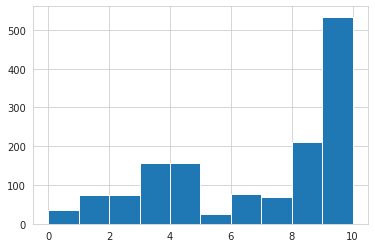

In [157]:
comentarios["nota_final"].hist()

In [158]:
len(comentarios[comentarios["nota_final"]>6])

813

In [160]:
len(comentarios[comentarios["nota_final"]<=6.32])

600

In [161]:
comentarios.to_csv('/content/drive/My Drive/Colab Notebooks/embaixadores_da_cidadania_total_final_02_04.csv')
